# Project: Investigate `TMDB Movie DataSet`

---

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='Introduction'></a>

## Introduction About DataSet


<blockquote>
<h3> For Data Analysis I have Choosen TMDB Movie Dataset </h3>
<h4> About TMDB Movie Dataset </h4>
It store the movies data more then 10,000 from the year 1960 to 2015 
</blockquote>


## Process

<blockquote>

### Question's I'm Going To Work
- 1) Highest Profitable movie all over the year of 1960 to 2015 
    <br> (Low Budget High Revenue)
   
- 2) Most used keywords all over the year of 1960 to 2015 <br>
(Done by Extracting a Keyword String)

- 3) Movie production just exploded in year between 1980 to 1990.
<br> It could be due to advancement in technology and commercialisation of internet.

- 4) Number of Movies Directed by the `Director` from 1960 to 2015

- 5) Movies Genre which are very much liked by the audience

</blockquote>


---
<blockquote>

### Importing Libraries 
</blockquote>

---

<blockquote>

### Data Wrangling 
- 1) Gathering of data
- 2) Assessing of data
- 3) Data Cleaning
</blockquote>

---
<blockquote>

### EXPLORATORY DATA ANALYSIS (EDA) 
- 1) Analyzing
- 2) Visualizing
- 3) Feature Engineering
</blockquote>

---
<blockquote>

### CONCLUSION 
</blockquote>

---


### **Importing Libraries**

I used Plotly for multiple plot to install this lib follow the below command <br>
pip install plotly==4.7.1 <br>
But for now i'm using seaborn and matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## Data Wrangling

<!-- > **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions. -->

Loading the Dataset

In [0]:
df = pd.read_csv("tmdb-movies.csv")
# Going to backup this dataset for future purpose 
df_cpy = df.copy()

Going to Remove the columns which doesn't possess any useful information

In [0]:
df.drop(['id','imdb_id','homepage','tagline','overview','production_companies','budget_adj','revenue_adj','keywords'], axis = 1 , inplace=True) 

Renaming some columns with easy to understand and meaningful

In [0]:
df.rename(columns={'original_title': 'movie','vote_count': 'vote','vote_average': 'rating','release_year': 'year'},inplace=True)

Assessing of data

In [6]:
print("Rows : ",df.shape[0])
print("Columns : ",df.shape[1])

Rows :  10866
Columns :  12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   movie         10866 non-null  object 
 4   cast          10790 non-null  object 
 5   director      10822 non-null  object 
 6   runtime       10866 non-null  int64  
 7   genres        10843 non-null  object 
 8   release_date  10866 non-null  object 
 9   vote          10866 non-null  int64  
 10  rating        10866 non-null  float64
 11  year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


In [8]:
df.describe()

,popularity,budget,revenue,runtime,vote,rating,year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [9]:
print("Count of Nan Columns")
df.isna().sum()

Count of Nan Columns


popularity       0
budget           0
revenue          0
movie            0
cast            76
director        44
runtime          0
genres          23
release_date     0
vote             0
rating           0
year             0
dtype: int64

### Data Cleaning

Filling the Nan value <br>


In [10]:
# By analysis we found that the most nan value found in cast was related to generes
df[df["cast"].isnull()].genres.unique()

array(['Animation', 'Documentary', 'Science Fiction|Action|Animation',
       nan, 'Animation|Comedy|Science Fiction', 'War|Documentary',
       'Documentary|Thriller', 'Drama|Comedy|Family',
       'Animation|Fantasy|Mystery', 'Animation|Comedy',
       'Documentary|History|War', 'Family', 'Animation|Family|Fantasy',
       'Animation|Comedy|Family', 'Foreign|Documentary',
       'Adventure|Animation', 'Drama|Animation',
       'Documentary|Drama|Music|Thriller',
       'Fantasy|Animation|Comedy|Drama', 'Documentary|History',
       'Animation|Family', 'Animation|Fantasy', 'Animation|Family|Music',
       'Animation|Action', 'Animation|Drama', 'Documentary|Drama|Music',
       'Action|Adventure|Animation|Family|Fantasy', 'Drama'], dtype=object)

In [11]:
# If we see the above List we can easly say that In genres (Documentary, Animation , and Drama) is holding Max nan value in 
df[df['cast'].isna()].head(5)

,popularity,budget,revenue,movie,cast,director,runtime,genres,release_date,vote,rating,year
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015
536,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,12,8.0,2015
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,11,8.9,2015


In [12]:
# If we just cross check by using those Geners we found the below result
i=0
temp = df[df['cast'].isna()]
for index, row in temp.iterrows(): 
    if(type(row["genres"]) == str):
        if('Documentary' in row["genres"].split('|') or 'Animation' in row["genres"].split('|') or 'Drama' in row["genres"].split('|')) :
            i=i+1
print("Overall 74 Nan Value was hold by this three Geners Category (Documentary, Animation , and Drama)" , i)

# Total 76 Nan Value in genres
#  And this three Geners Category (Documentary, Animation , and Drama) possess 74 Nan Value


Overall 74 Nan Value was hold by this three Geners Category (Documentary, Animation , and Drama) 74


In [0]:
# So I'm going to fill the Geners with No_cast value
df['cast'].fillna('No_Cast' , inplace=True)

In [14]:
print("Count of Nan Columns")
df.isna().sum()

Count of Nan Columns


popularity       0
budget           0
revenue          0
movie            0
cast             0
director        44
runtime          0
genres          23
release_date     0
vote             0
rating           0
year             0
dtype: int64

Droping Duplicate rows

In [15]:
print('Before Dropping ' , df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('After Dropping ' , df.duplicated().sum())

Before Dropping  1
After Dropping  0


Droppping Rows with Nan Values

In [16]:
df[df['director'].isna()].head(5)

,popularity,budget,revenue,movie,cast,director,runtime,genres,release_date,vote,rating,year
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015
548,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015
556,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015
1032,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,32,6.3,2014
1054,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,11,7.2,2014


In [17]:
# If we Notice the below rows does not possess most values so we are going to drop that rows
df[df["genres"].isnull() & df["director"].isnull()]

,popularity,budget,revenue,movie,cast,director,runtime,genres,release_date,vote,rating,year
2376,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,12/25/10,11,7.7,2010
4797,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,60,NaN,12/25/12,10,7.8,2012


In [0]:
# Going to drop above rows
gen_dir = df[df["genres"].isnull() & df["director"].isnull()].index
df.drop(gen_dir,inplace=True)

In [19]:
# As the Genres which hold Nan value dont possess budget , revenue & genres
df[df['genres'].isna()].head(5)

,popularity,budget,revenue,movie,cast,director,runtime,genres,release_date,vote,rating,year
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015
620,0.129696,0,0,All Hallows' Eve 2,No_Cast,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009


In [0]:
# Because Lack of information in the above rows i'm going to remove it
gen = df[df["genres"].isnull()].index
df.drop(gen,inplace=True)

In [21]:
# Where director rows are nan parallel revenu and budget is also zero   
df[df['director'].isna()].head(5)

,popularity,budget,revenue,movie,cast,director,runtime,genres,release_date,vote,rating,year
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015
548,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015
556,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015
1032,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,32,6.3,2014
1054,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,11,7.2,2014


In [0]:
# so i'm going to drop it
dire = df[df["director"].isnull()].index
df.drop(dire,inplace=True)

In [23]:
df.isna().sum()

popularity      0
budget          0
revenue         0
movie           0
cast            0
director        0
runtime         0
genres          0
release_date    0
vote            0
rating          0
year            0
dtype: int64

In [0]:
# Before we removing Nan rows the Total Rows are 10865
# After removing it become 10799

Variable Conversion

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10800 non-null  float64
 1   budget        10800 non-null  int64  
 2   revenue       10800 non-null  int64  
 3   movie         10800 non-null  object 
 4   cast          10800 non-null  object 
 5   director      10800 non-null  object 
 6   runtime       10800 non-null  int64  
 7   genres        10800 non-null  object 
 8   release_date  10800 non-null  object 
 9   vote          10800 non-null  int64  
 10  rating        10800 non-null  float64
 11  year          10800 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


In [0]:
# Based on the info there is only one column 'release_date' is possess different datatype
df["release_date"]= pd.to_datetime(df["release_date"]) 

<a id='eda'></a>
## Exploratory Data Analysis


### Feature Engineering 

In [0]:
def profit_cal():
    # We Create new Column saying Gross Profit 
    # If we just subtract revenue & budget we end up with wrong conclusion 

    # (Total Revenue / Total Expense )*100
    # 8169363/8175346*100

    df['g_profit'] = round((df['revenue']/df['budget'])*100)

    # if we encounter any misplaced value such as zero revenue or zero budget we end up with na value so we explicitly fill na with zero
    df['g_profit'].replace([np.inf, -np.inf], np.nan , inplace=True)
    df['g_profit'].fillna(0,inplace=True)
profit_cal()

In [28]:
df.head(1)

,popularity,budget,revenue,movie,cast,director,runtime,genres,release_date,vote,rating,year,g_profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1009.0


### Research Question 1 

> Highest Profitable movie all over the year of 1960 to 2015 <br>
(Low Budget High Revenue)







In [29]:
df.sort_values(['g_profit'], ascending = False).head(5)

,popularity,budget,revenue,movie,cast,director,runtime,genres,release_date,vote,rating,year,g_profit
10495,0.772494,113,115103979,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113,Adventure|Drama|Action|Romance|Family,1986-06-18,211,5.8,1986,101861928.0
6179,0.132713,114,6700000,Into the Night,Jeff Goldblum|Michelle Pfeiffer|Stacey Pickren...,John Landis,115,Comedy|Drama|Thriller,1985-02-15,24,6.1,1985,5877193.0
3608,0.463510,93,2500000,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,Angel Gracia,107,Comedy|Drama|Romance,2011-01-28,47,5.2,2011,2688172.0
7447,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86,Horror|Mystery,2007-09-14,714,6.1,2007,1289039.0
2449,0.934621,25000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81,Horror|Mystery,1999-07-14,522,6.3,1999,992000.0


In [0]:
# If we notice the budget of some movies got wrong so we need to fill it manually  
df.loc[10495,'budget'] = 13000000
df.loc[6179,'budget'] = 7500000
df.loc[3608,'budget'] = 3000000
profit_cal()

# After completing this manual process we call 'profit_cal()'
# its become a long process to find and all outlier values manually so i stopped it 
# Solution for this process is webscripping were we can find the value from sources and we can fill it

In [31]:
df.sort_values(['g_profit'], ascending = False).head(5)

,popularity,budget,revenue,movie,cast,director,runtime,genres,release_date,vote,rating,year,g_profit
7447,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86,Horror|Mystery,2007-09-14,714,6.1,2007,1289039.0
2449,0.934621,25000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81,Horror|Mystery,1999-07-14,522,6.3,1999,992000.0
3581,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90,Comedy|Romance,2011-06-03,55,5.3,2011,137800.0
1354,0.331417,10000,7000000,Eraserhead,Jack Nance|Charlotte Stewart|Allen Joseph|Jean...,David Lynch,89,Science Fiction|Fantasy|Horror|Drama,1977-03-19,194,7.1,1977,70000.0
7277,0.412913,12000,6000000,Pink Flamingos,Divine|David Lochary|Mary Vivian Pearce|Mink S...,John Waters,93,Comedy,1972-03-12,51,6.3,1972,50000.0


### Research Question 2

> Most used keywords all over the year of 1960 to 2015 <br>
(Done by Extracting a Keyword String)







In [0]:
# Steps
# First Run a Loop using the count of keyword
# Second run inner loop to split a string for each keyword and add into a list
# Third when Outer loop complete create a dictionary with unique value from list and add the count beside it 
# So we get two information from it One Unique Keywords and the repetaion of keywords used in this dataset 

In [33]:
df_cpy.keywords

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

In [0]:
key_store = []
for key in df_cpy.keywords:
    if(type(key) == str):
        for individual_key in key.split('|'):
            key_store.append(individual_key) 


In [35]:
# Total Keywords
len(key_store)

37450

In [36]:
# Unique Keywords
x = np.array(key_store) 
len(np.unique(x))

7878

In [0]:
# Creating a Dictionary with keyword and count (how many times it used)
freq = {} 
for items in key_store: 
    freq[items] = key_store.count(items)

In [38]:
# displaying just first 5 out of 7878 dictionary
from itertools import islice
def take(n, iterable):
    return list(islice(iterable, n))

n_items = take(5, freq.items())
n_items

[('monster', 83),
 ('dna', 7),
 ('tyrannosaurus rex', 11),
 ('velociraptor', 3),
 ('island', 62)]

In [0]:
sort_keywords_based_on_count = sorted(freq.items(), key=lambda x: x[1],reverse=True)    

In [0]:
key = []
value=[]
for arr in sort_keywords_based_on_count:
    if(arr[1] > 99):
        key.append(arr[0])
        value.append(arr[1])

In [41]:
list_of_tuples = list(zip(key, value))  
keyword_df = pd.DataFrame(list_of_tuples, columns = ['Keyword', 'Keywords_Repeted'])  
keyword_df

,Keyword,Keywords_Repeted
0,woman director,413
1,independent film,396
2,based on novel,278
3,sex,272
4,sport,216
5,murder,204
6,biography,169
7,musical,169
8,new york,163
9,suspense,159


### Whcih Keyword has Used Most throught out the years is described using **Bar Plot Visualization**

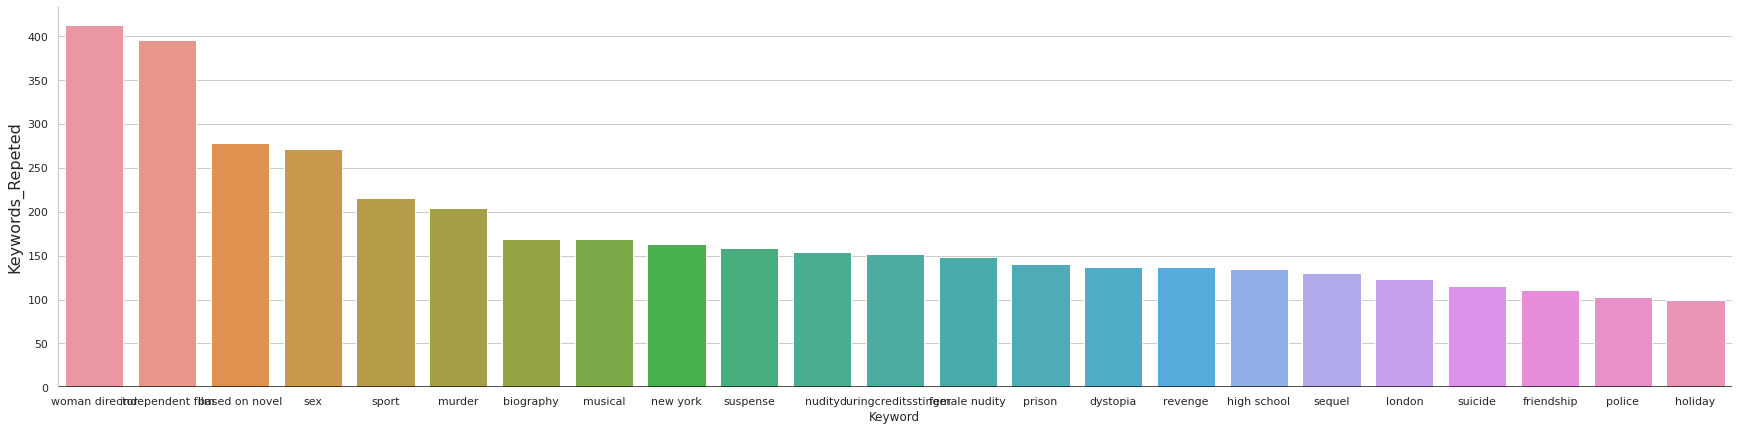

In [115]:
# plotly graph
# fig = px.bar(keyword_df, x='Keyword', y='Keywords_Repeted',
#              hover_data=['Keyword', 'Keywords_Repeted'], color='Keywords_Repeted',
#              labels={'pop':'population of Canada'}, height=400)
# fig.show()

f, (ax1) = plt.subplots(figsize=(30, 7), sharex=True)
sns.barplot(x=keyword_df.Keyword, y=keyword_df.Keywords_Repeted, ax=ax1)
ax1.axhline(0, color="k", clip_on=True)
plt.ylabel('Keywords_Repeted', fontsize=16)
ax.set_xlabel('Keyword',fontsize=26)
sns.despine(bottom=True)

### Research Question 3
Histogram of Movie Released
> Movie production just exploded in year between 1980 to 1990.
<br> It could be due to advancement in technology and commercialisation of internet.

### To Showcase the frequency of movies released in **DistantPlot Visualization**





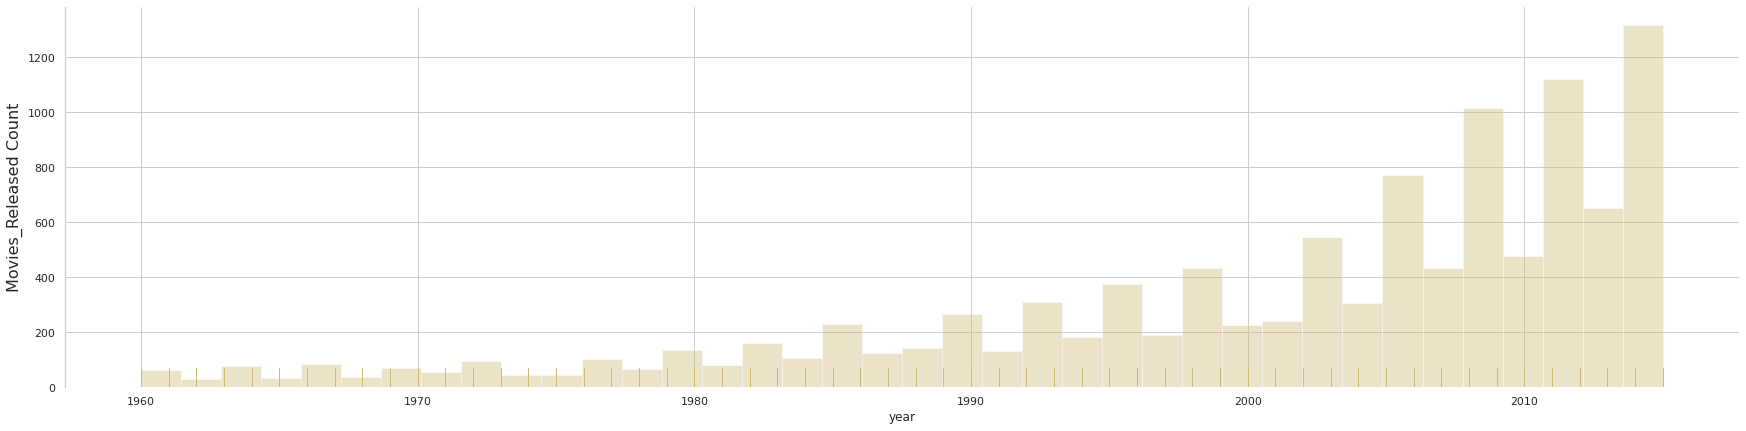

In [110]:
a4_dims = (28, 8)
sns.set_color_codes()
f, (ax1) = plt.subplots(figsize=(30, 7), sharex=True)

sns.distplot(df.year,color="y", kde=False, rug=True);

plt.ylabel('Movies_Released Count', fontsize=16)
ax.set_xlabel('Year',fontsize=16)
sns.despine(bottom=True)


In [44]:
df_cpy.director.head(10)

0                   Colin Trevorrow
1                     George Miller
2                  Robert Schwentke
3                       J.J. Abrams
4                         James Wan
5    Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                       Alan Taylor
7                      Ridley Scott
8          Kyle Balda|Pierre Coffin
9                       Pete Docter
Name: director, dtype: object

### Research Question 4
Number of Movies Directed by the `Director` from 1960 to 2015







In [0]:
dir_store = []
for key in df_cpy.director:
    if(type(key) == str):
        for individual_key in key.split('|'):
            dir_store.append(individual_key) 


In [46]:
# Total Directors with repeation
len(dir_store)

11892

In [47]:
# Unique Directors Count
x = np.array(dir_store) 
len(np.unique(x))

5362

In [0]:
# Creating a Dictionary with Name and count (how many times it used)
dir_freq = {} 
for items in dir_store: 
    dir_freq[items] = dir_store.count(items)

In [49]:
# displaying just first 5 out of 5362 dictionary
from itertools import islice
def take(n, iterable):
    return list(islice(iterable, n))

n_items = take(5, dir_freq.items())
n_items

[('Colin Trevorrow', 2),
 ('George Miller', 10),
 ('Robert Schwentke', 5),
 ('J.J. Abrams', 5),
 ('James Wan', 8)]

In [0]:
sort_dir_based_on_count = sorted(dir_freq.items(), key=lambda x: x[1],reverse=True)  
# sort_dir_based_on_count

In [0]:
dir_key = []
dir_value=[]
for arr in sort_dir_based_on_count:
    if(arr[1] > 0):
        dir_key.append(arr[0])
        dir_value.append(arr[1])

In [0]:
list_of_tuples = list(zip(dir_key, dir_value))  
dir_df = pd.DataFrame(list_of_tuples, columns = ['Director_Name', 'Frequency_Directed'])  
highly_directed = dir_df.head(20)

### Which Director has Directed Most high number of movies through out the years is described using **Bar Plot Visualization**

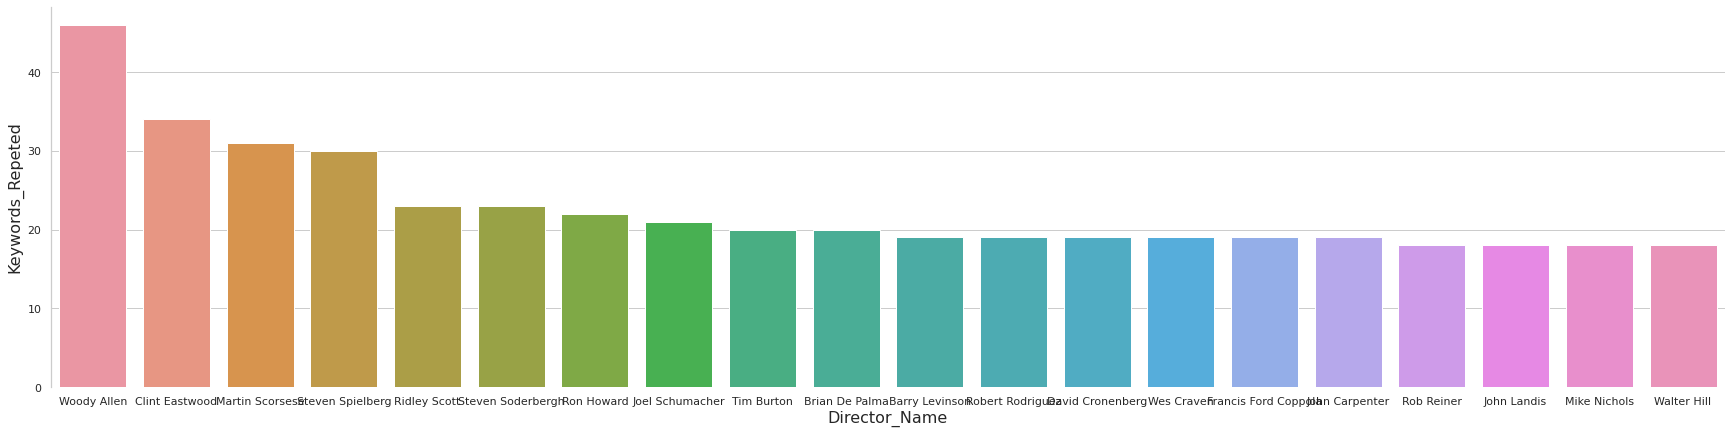

In [105]:
# plotly graph

# fig1 = px.bar(highly_directed, x='Director_Name', y='Frequency_Directed', 
#               title="Top 20 Director's with high Count of movie Driected",
#               color_discrete_sequence=['indianred'],
#              )
# fig1.show()

sns.set_color_codes()
f, (ax1) = plt.subplots(figsize=(30, 7), sharex=True)
sns.set(style="whitegrid")

ax = sns.barplot(x="Director_Name", y="Frequency_Directed", data=highly_directed)

plt.ylabel('Frequency_Directed', fontsize=16)
ax.set_xlabel('Director_Name',fontsize=16)
sns.despine(bottom=True)


In [54]:
highly_directed

,Director_Name,Frequency_Directed
0,Woody Allen,46
1,Clint Eastwood,34
2,Martin Scorsese,31
3,Steven Spielberg,30
4,Ridley Scott,23
5,Steven Soderbergh,23
6,Ron Howard,22
7,Joel Schumacher,21
8,Tim Burton,20
9,Brian De Palma,20


In [55]:
highly_directed.Director_Name.values

array(['Woody Allen', 'Clint Eastwood', 'Martin Scorsese',
       'Steven Spielberg', 'Ridley Scott', 'Steven Soderbergh',
       'Ron Howard', 'Joel Schumacher', 'Tim Burton', 'Brian De Palma',
       'Barry Levinson', 'Robert Rodriguez', 'David Cronenberg',
       'Wes Craven', 'Francis Ford Coppola', 'John Carpenter',
       'Rob Reiner', 'John Landis', 'Mike Nichols', 'Walter Hill'],
      dtype=object)

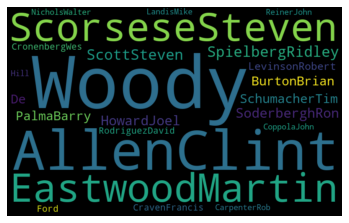

In [116]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# initialize an empty string 
str1 = ""  

# traverse in the string   
for ele in highly_directed.Director_Name.values:  
    str1 += ele   

wordcloud = WordCloud(width=800, height=500, margin=10).generate(str1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


### Research Question 5
Movies Genre which are very much liked by the audience


In [57]:
df.genres.nunique()

2031

In [0]:
# Splitting Geners string in to individual list
 
genres_store = []
for key in df.genres:
    if(type(key) == str):
        for individual_key in key.split('|'):
            genres_store.append(individual_key) 


In [0]:
#  From the derived list converting in to unique list
genres_list = list(set(genres_store)) 

In [60]:
# There are total 20 Geners
genres_list

['Thriller',
 'Crime',
 'Science Fiction',
 'Romance',
 'Documentary',
 'Foreign',
 'Horror',
 'TV Movie',
 'War',
 'Comedy',
 'Drama',
 'Animation',
 'Fantasy',
 'Mystery',
 'Action',
 'Music',
 'Adventure',
 'History',
 'Western',
 'Family']

In [0]:
# As per the frequency im going to use the top 5 geners name and grouping as others column as one
freq_g = {} 
for items in genres_store: 
    freq_g[items] = genres_store.count(items)

In [62]:
freq_g

{'Action': 2378,
 'Adventure': 1466,
 'Animation': 692,
 'Comedy': 3782,
 'Crime': 1353,
 'Documentary': 509,
 'Drama': 4754,
 'Family': 1223,
 'Fantasy': 912,
 'Foreign': 185,
 'History': 332,
 'Horror': 1636,
 'Music': 402,
 'Mystery': 809,
 'Romance': 1708,
 'Science Fiction': 1223,
 'TV Movie': 162,
 'Thriller': 2904,
 'War': 270,
 'Western': 164}

In [63]:
# Displaying Geners Count in Desending order
geners_in_des = sorted(freq_g.items(), key=lambda x: x[1],reverse=True)    
geners_in_des

[('Drama', 4754),
 ('Comedy', 3782),
 ('Thriller', 2904),
 ('Action', 2378),
 ('Romance', 1708),
 ('Horror', 1636),
 ('Adventure', 1466),
 ('Crime', 1353),
 ('Science Fiction', 1223),
 ('Family', 1223),
 ('Fantasy', 912),
 ('Mystery', 809),
 ('Animation', 692),
 ('Documentary', 509),
 ('Music', 402),
 ('History', 332),
 ('War', 270),
 ('Foreign', 185),
 ('Western', 164),
 ('TV Movie', 162)]

In [0]:
# Im going to take the geners as a columns which have more then 1000 count 
genre_key = []
genre_value=[]
for arr in geners_in_des:
    genre_key.append(arr[0])
    genre_value.append(arr[1])

In [65]:
list_of_tuples = list(zip(genre_key, genre_value))  
genre_df = pd.DataFrame(list_of_tuples, columns = ['Genere', 'Most_Watched'])  
genre_df
# highly_directed

,Genere,Most_Watched
0,Drama,4754
1,Comedy,3782
2,Thriller,2904
3,Action,2378
4,Romance,1708
5,Horror,1636
6,Adventure,1466
7,Crime,1353
8,Science Fiction,1223
9,Family,1223


### Which Genres has Audience liked most is described using **Bar Plot Visualization**

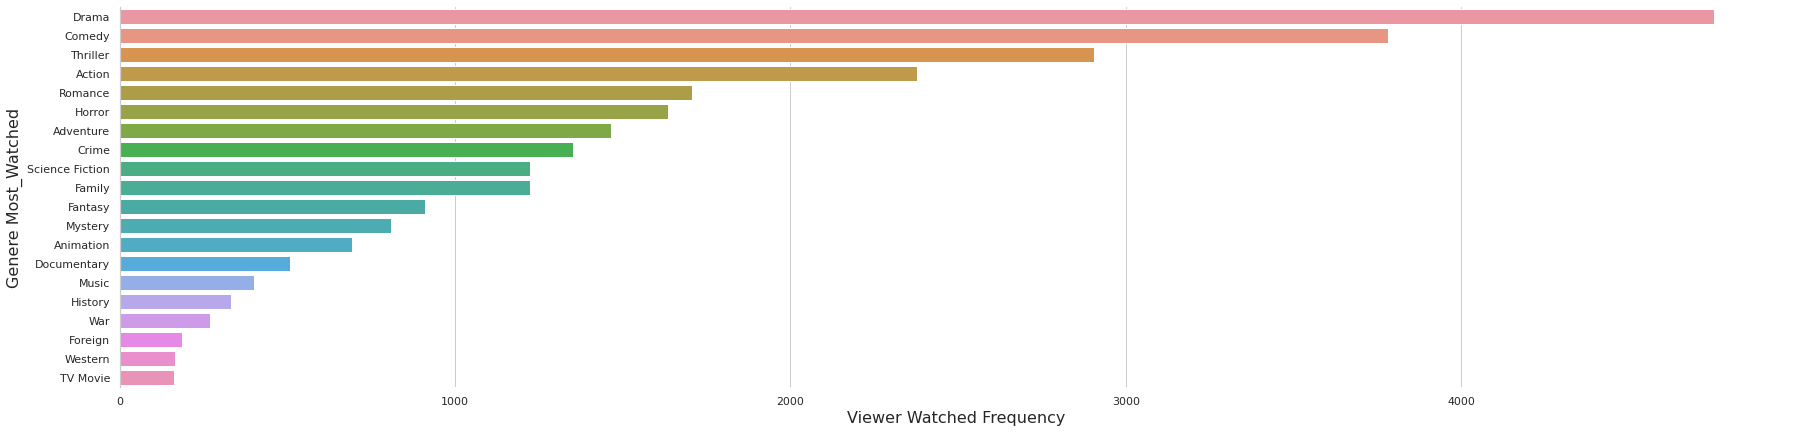

In [99]:
# fig = px.bar(   
#         x=genre_df.Most_Watched, 
#         y=genre_df.Genere, 
#         labels={'x':'Viewer Watched Frequency', 'y':'Genre'},
#         orientation='h',
#         height = 700,
#         )
# fig.show()


f, (ax1) = plt.subplots(figsize=(30, 7), sharex=True)
ax = sns.barplot(x='Most_Watched', y='Genere', data=genre_df)
plt.ylabel('Genere Most_Watched', fontsize=16)
ax.set_xlabel('Viewer Watched Frequency',fontsize=16)
sns.despine(bottom=True)

### Audience Prefered Genres shown in percentage using pie Chart

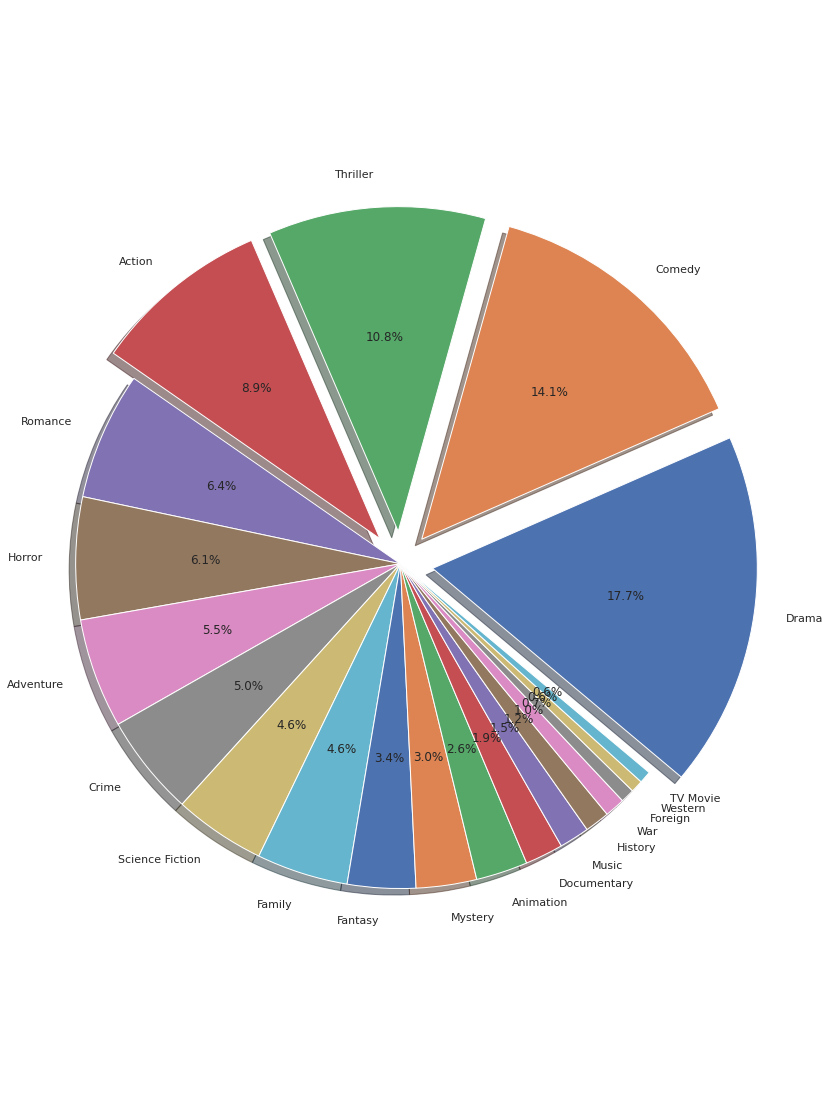

In [67]:
# fig = px.pie(genre_df, values='Most_Watched', names='Genere')
# fig.update_traces(textposition='inside')
# fig.show()

labels = genre_df.Genere
sizes = genre_df.Most_Watched
explode = np.repeat(0,genre_df.shape[0]-1)
exp = explode.tolist()
exp[0:3] = [0.1,0.1,0.1,0.1]



fig1, ax1 = plt.subplots(figsize=(15, 15))
fig1.subplots_adjust(0.3,0,1,1)

ax1.pie(sizes,explode=exp, labels=labels, autopct='%1.1f%%', shadow=True, startangle=320)
ax1.axis('equal') 

plt.show()

In [68]:
exp

[0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Based on above chart we can say that huge amount audiounce are more attracted to Drama, Comedy, Thriller & Action then other Genres

Some General Analysis

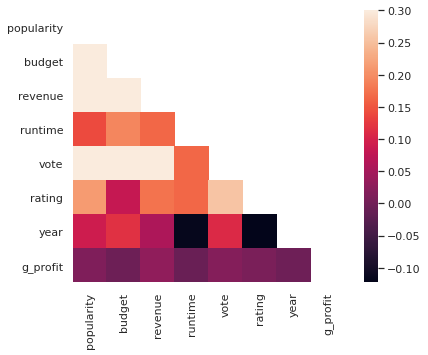

In [69]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

Removing Outlier from this dataset <br>
By removing Outlier of individual Column `Runtime` is Significantly removed all other column's outlier

In [0]:
q_low = df["runtime"].quantile(.028)
q_hi  = df["runtime"].quantile(0.97)
df_filtered = df[(df["runtime"] < q_hi) & (df["runtime"] > q_low)]

General Idea using **Pairplot Visulazation** to find the correlation between each columns

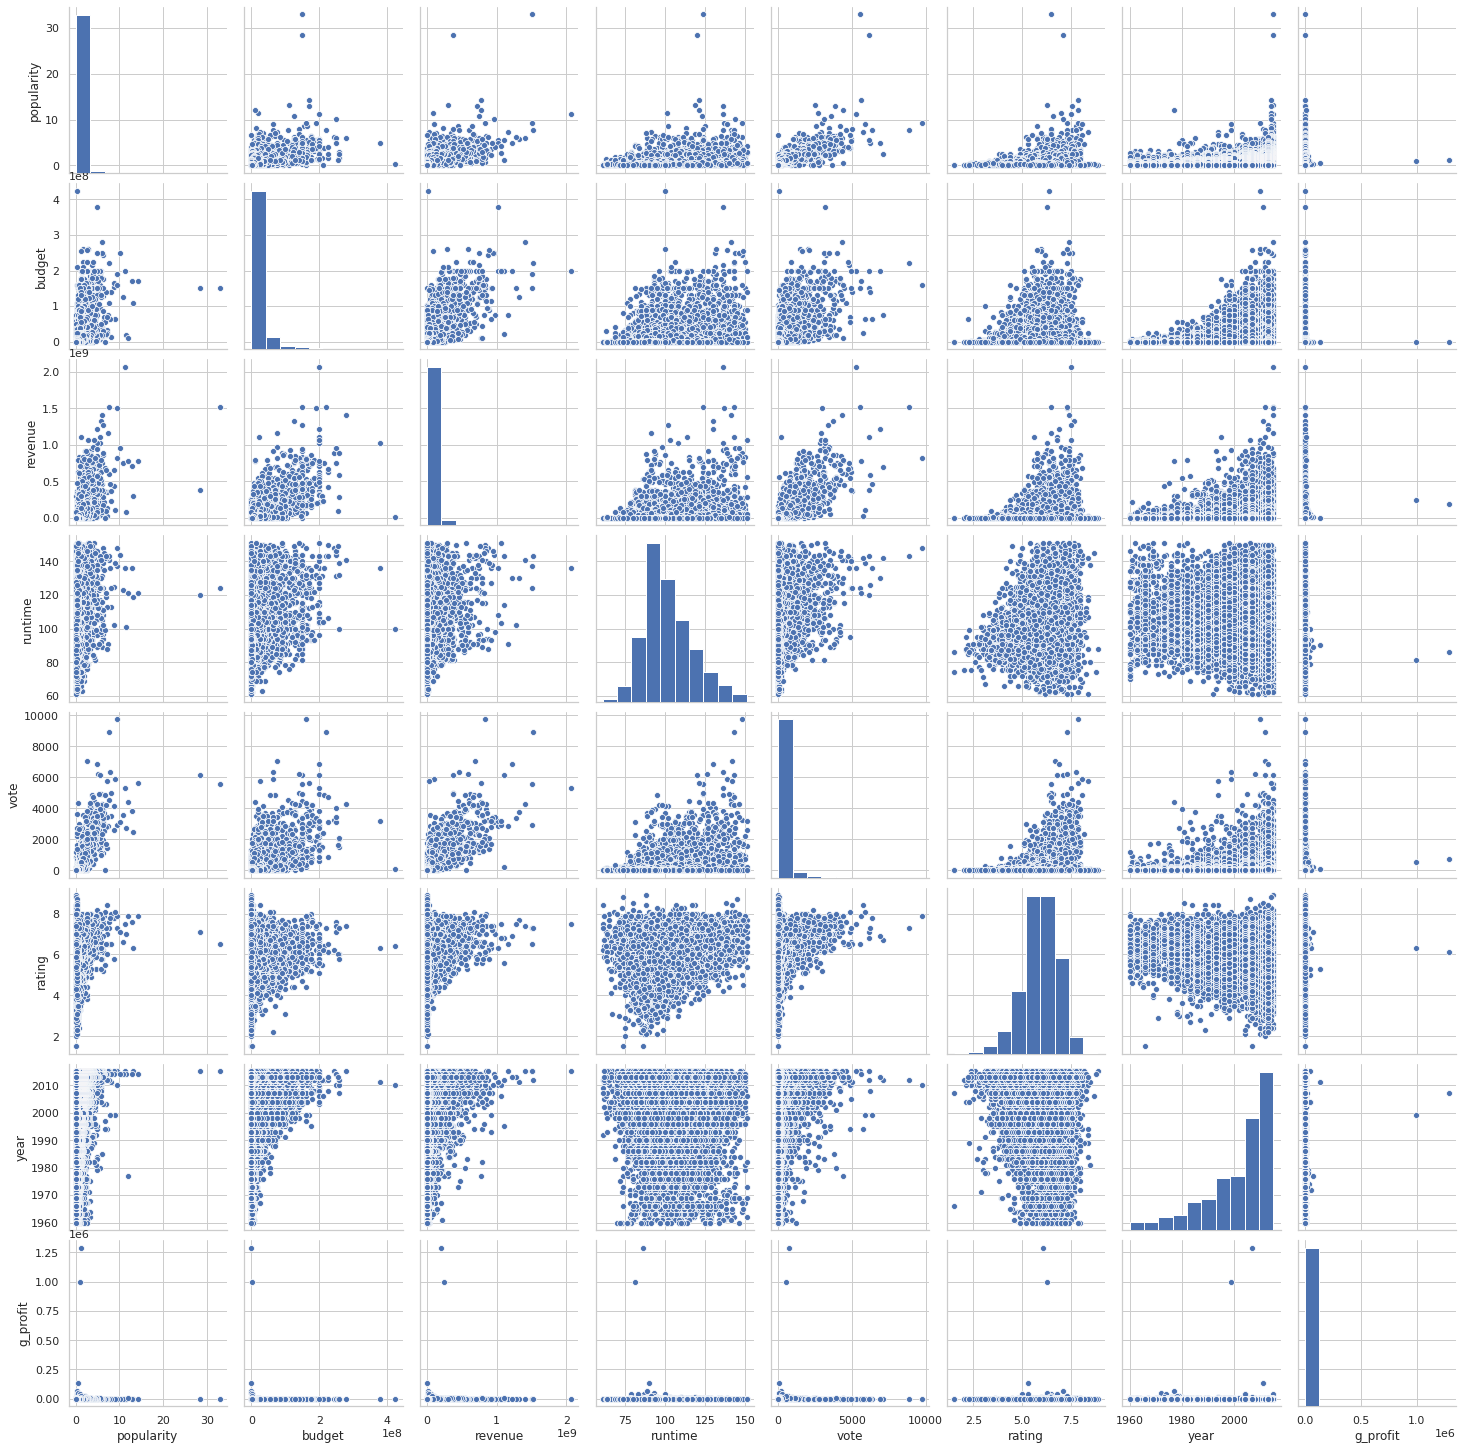

In [71]:
sns.pairplot(df_filtered);

In [72]:
df_filtered.rating.describe()

count    10155.000000
mean         5.929089
std          0.920438
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          8.900000
Name: rating, dtype: float64

In [73]:
df_filtered.groupby(['year'])['budget'].sum().sort_values(ascending=False).head(10)

year
2010    9215201006
2013    8796819761
2011    8669991826
2009    7681829056
2012    7441573635
2015    7416917528
2014    7401590138
2008    7225935797
2007    6988127112
2006    6939370500
Name: budget, dtype: int64

In [74]:
df_filtered.groupby(['year'])['revenue'].sum().sort_values(ascending=False).head(10)

year
2015    26073739898
2013    23173821399
2014    23151516875
2011    22331494827
2010    21958160266
2012    21439902377
2007    17933956109
2008    17925863392
2009    17119907638
2004    15902383040
Name: revenue, dtype: int64

<a id='conclusions'></a>
## Conclusions


The preparation of the data, the modeling of these data, then the visualization of these data with a variety of graphs, and finally the interpretation of these graphs & numbers made it possible to conduct an analysis on the TMDB Movie Dataset





## **Challenges I Faced in this Dataset:**
- Its little Tricky to split Keywords and genres from Sting to individual list with its Count
- Deciding Which Column is not usefull for my analysis because Maximum Columns inside this dataset are Categorial Variable's
- Most of the Budget and Revenu Columns ae miss filled so it take me to fill some of the data manually 
- Finally Deciding which Question is Sutiable for this dataset is really a best part which i worked hard



---





## **This study through a large volume of data, allowed me to determine the following points for movies between 1966 to 2015:** <br>
Some Of the Prediction off the Question's

- Audience Ratings: Most of the audience ratings are between 5.5/10 and 7/10. <br>
- Based on the Dataset the film industry has spend more on production on 2010 followed by 2013 and 2011 <br>
- Most Revenue Generated Year was 2015 followed by 2013 & 2014 <br>
- Most movies last between 60 minutes and 120 minutes <br>
- Movies Revenue Is Highly Correlated With Popularity <br>



### Referred to complete this Project
Kaggle <br>
Github <br>